# How to use `lightkurve`'s river plot function

When we are looking for periodic signals, sometimes it can be useful to see how they evolve overtime. You can do that using the `lightkurve` method `plot_river` on a `FoldedLightCurve` object. Let's look at how to do that now

In [1]:
% load_ext autoreload
% autoreload 2

In [2]:
import lightkurve as lk

The first thing we are going to do is download some data. We'll use the target `KIC 6185476`, which is also known as `KOI-227`. This object exhibits strong Transit Timing Variations (TTVs), where the planet candidate changes its transit time, and is not exactly periodic.

We can use `lightkurve`'s `search_lightcurvefile` function to get all of the light curves from MAST and stitch them together.

In [3]:
lc = lk.search_lightcurvefile('KIC 6185476').download_all().PDCSAP_FLUX.stitch()

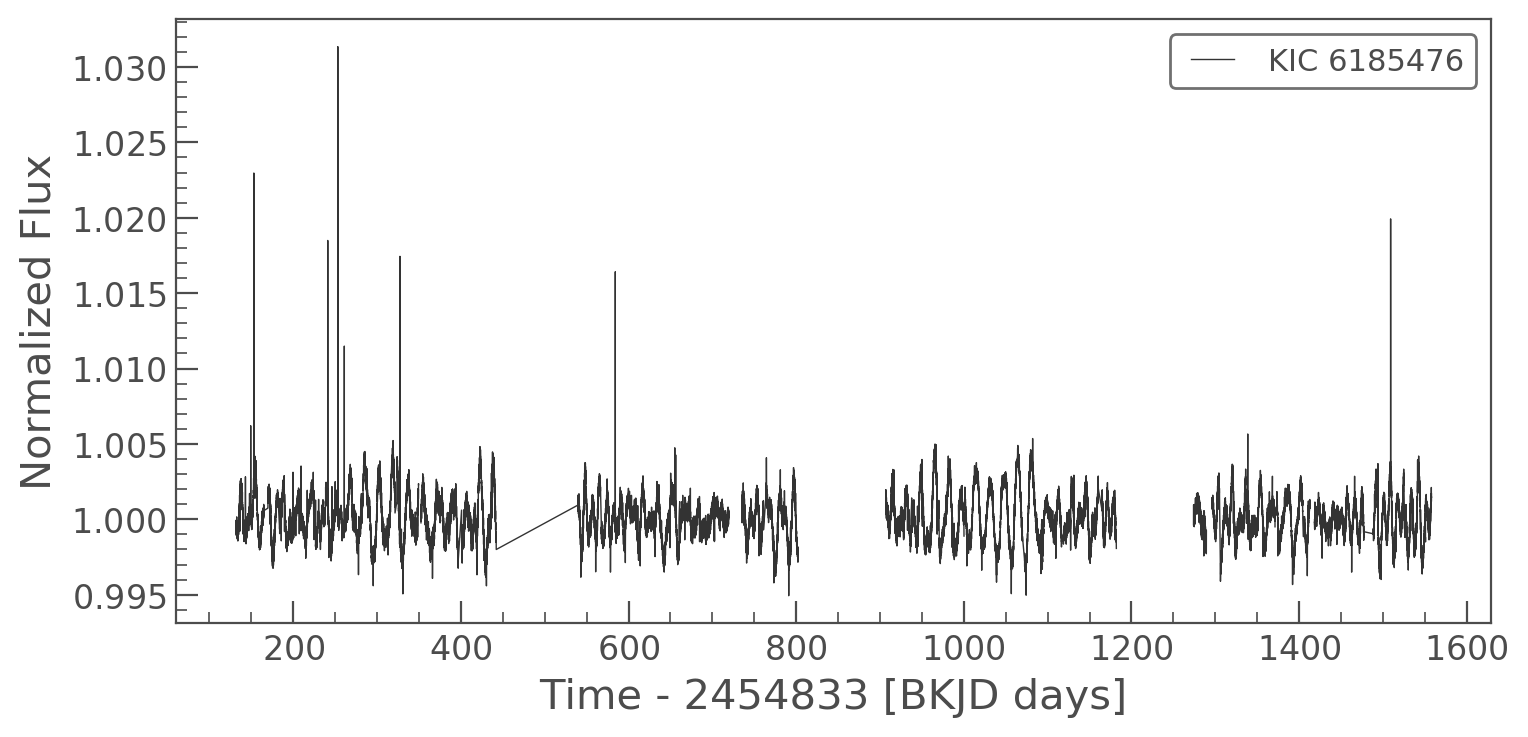

In [4]:
lc.plot()

When we plot the data, we see that there is a long term trend, likely from starspots. We can remove this with a simple Savitzky-Golay filter using `lightkurve`'s `flatten` method.

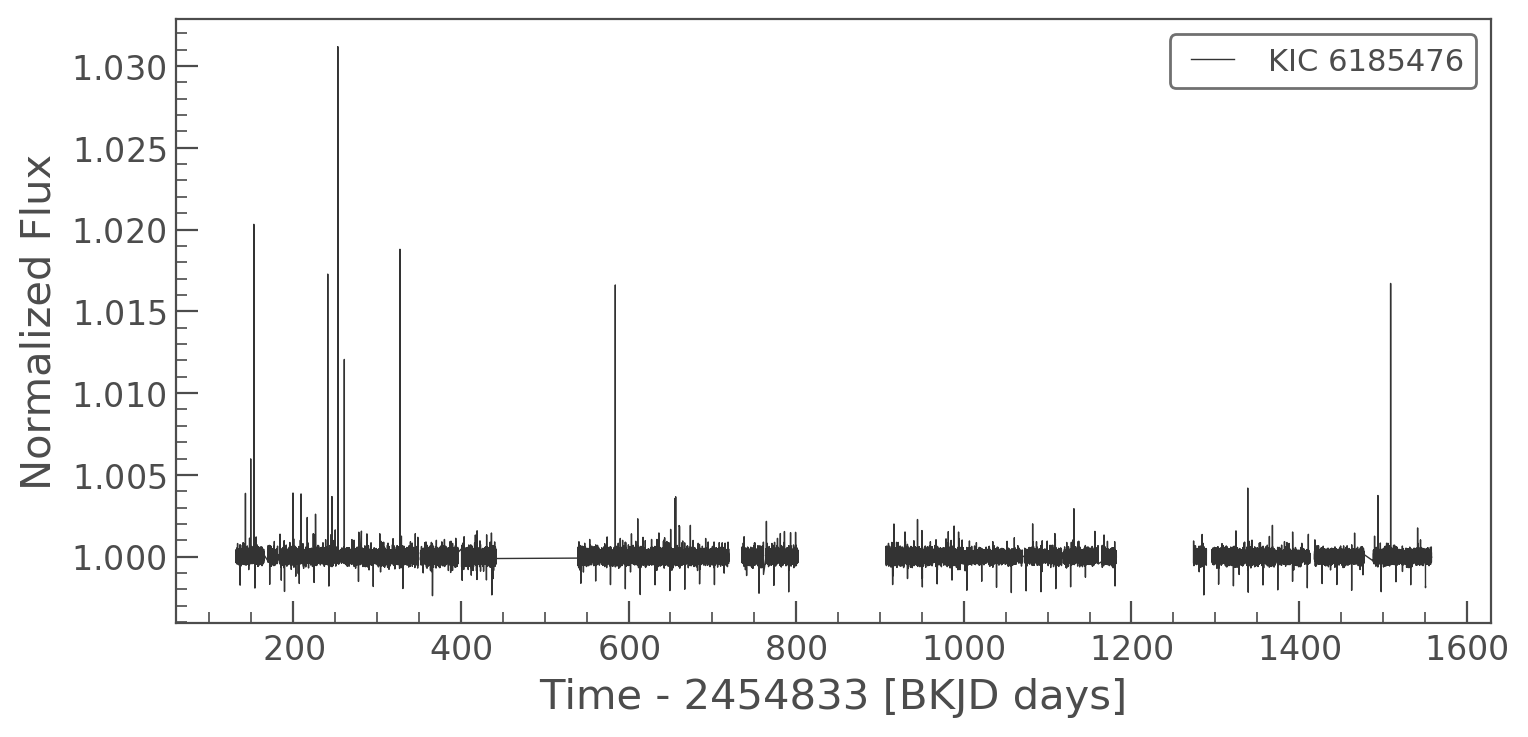

In [5]:
clc = lc.flatten(21)
clc.plot()

The light curve is now flat, let's fold the light curve and plot it.

In [6]:
# Period and t0 from NASA Exoplanet Archive
p, t0 = 17.660114, 136.57258

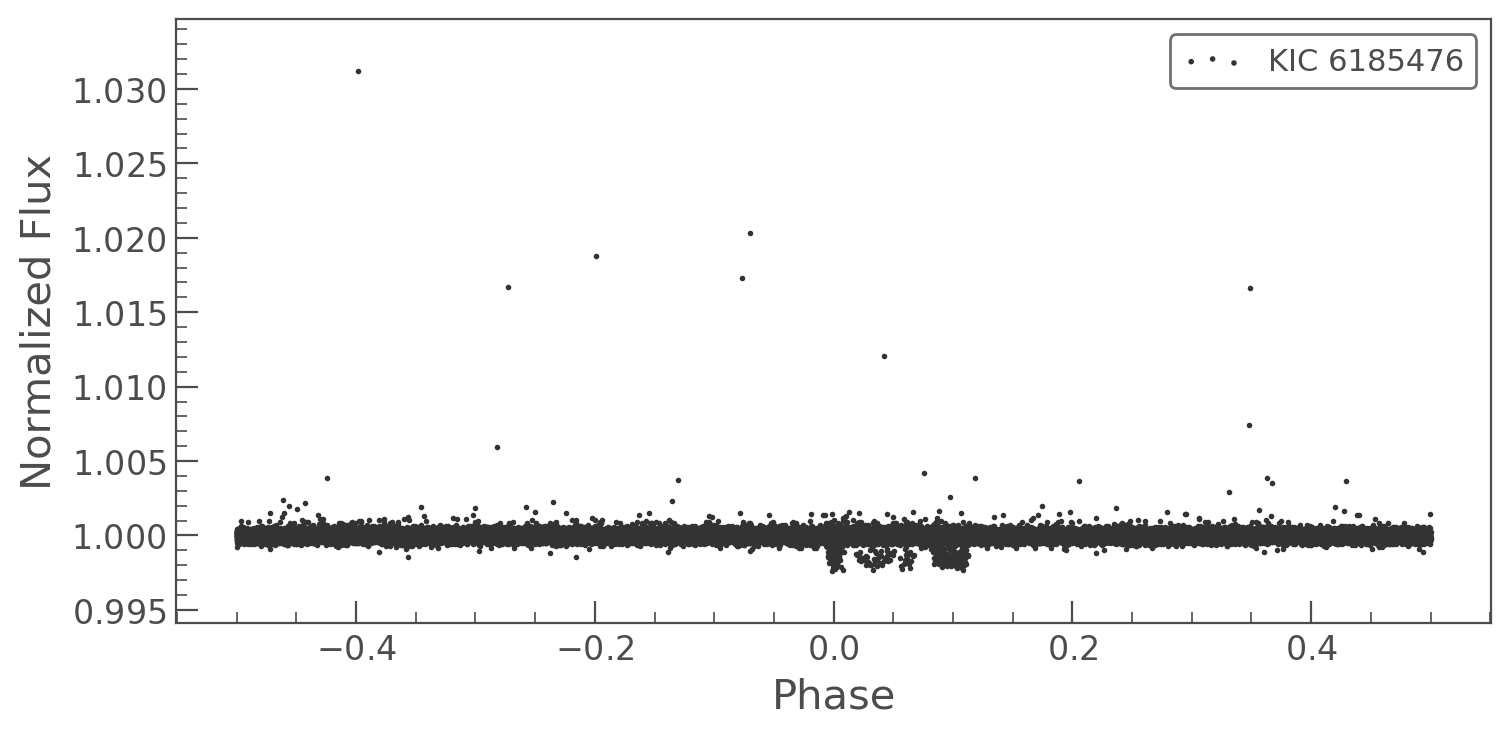

In [7]:
folded_lc = clc.fold(p, t0)
folded_lc.scatter()

It looks like there is a concentration of points that are around phase of `0`, but they don't seem to line up nicely. Let's use `river` to plot the light curve in a more legible way.

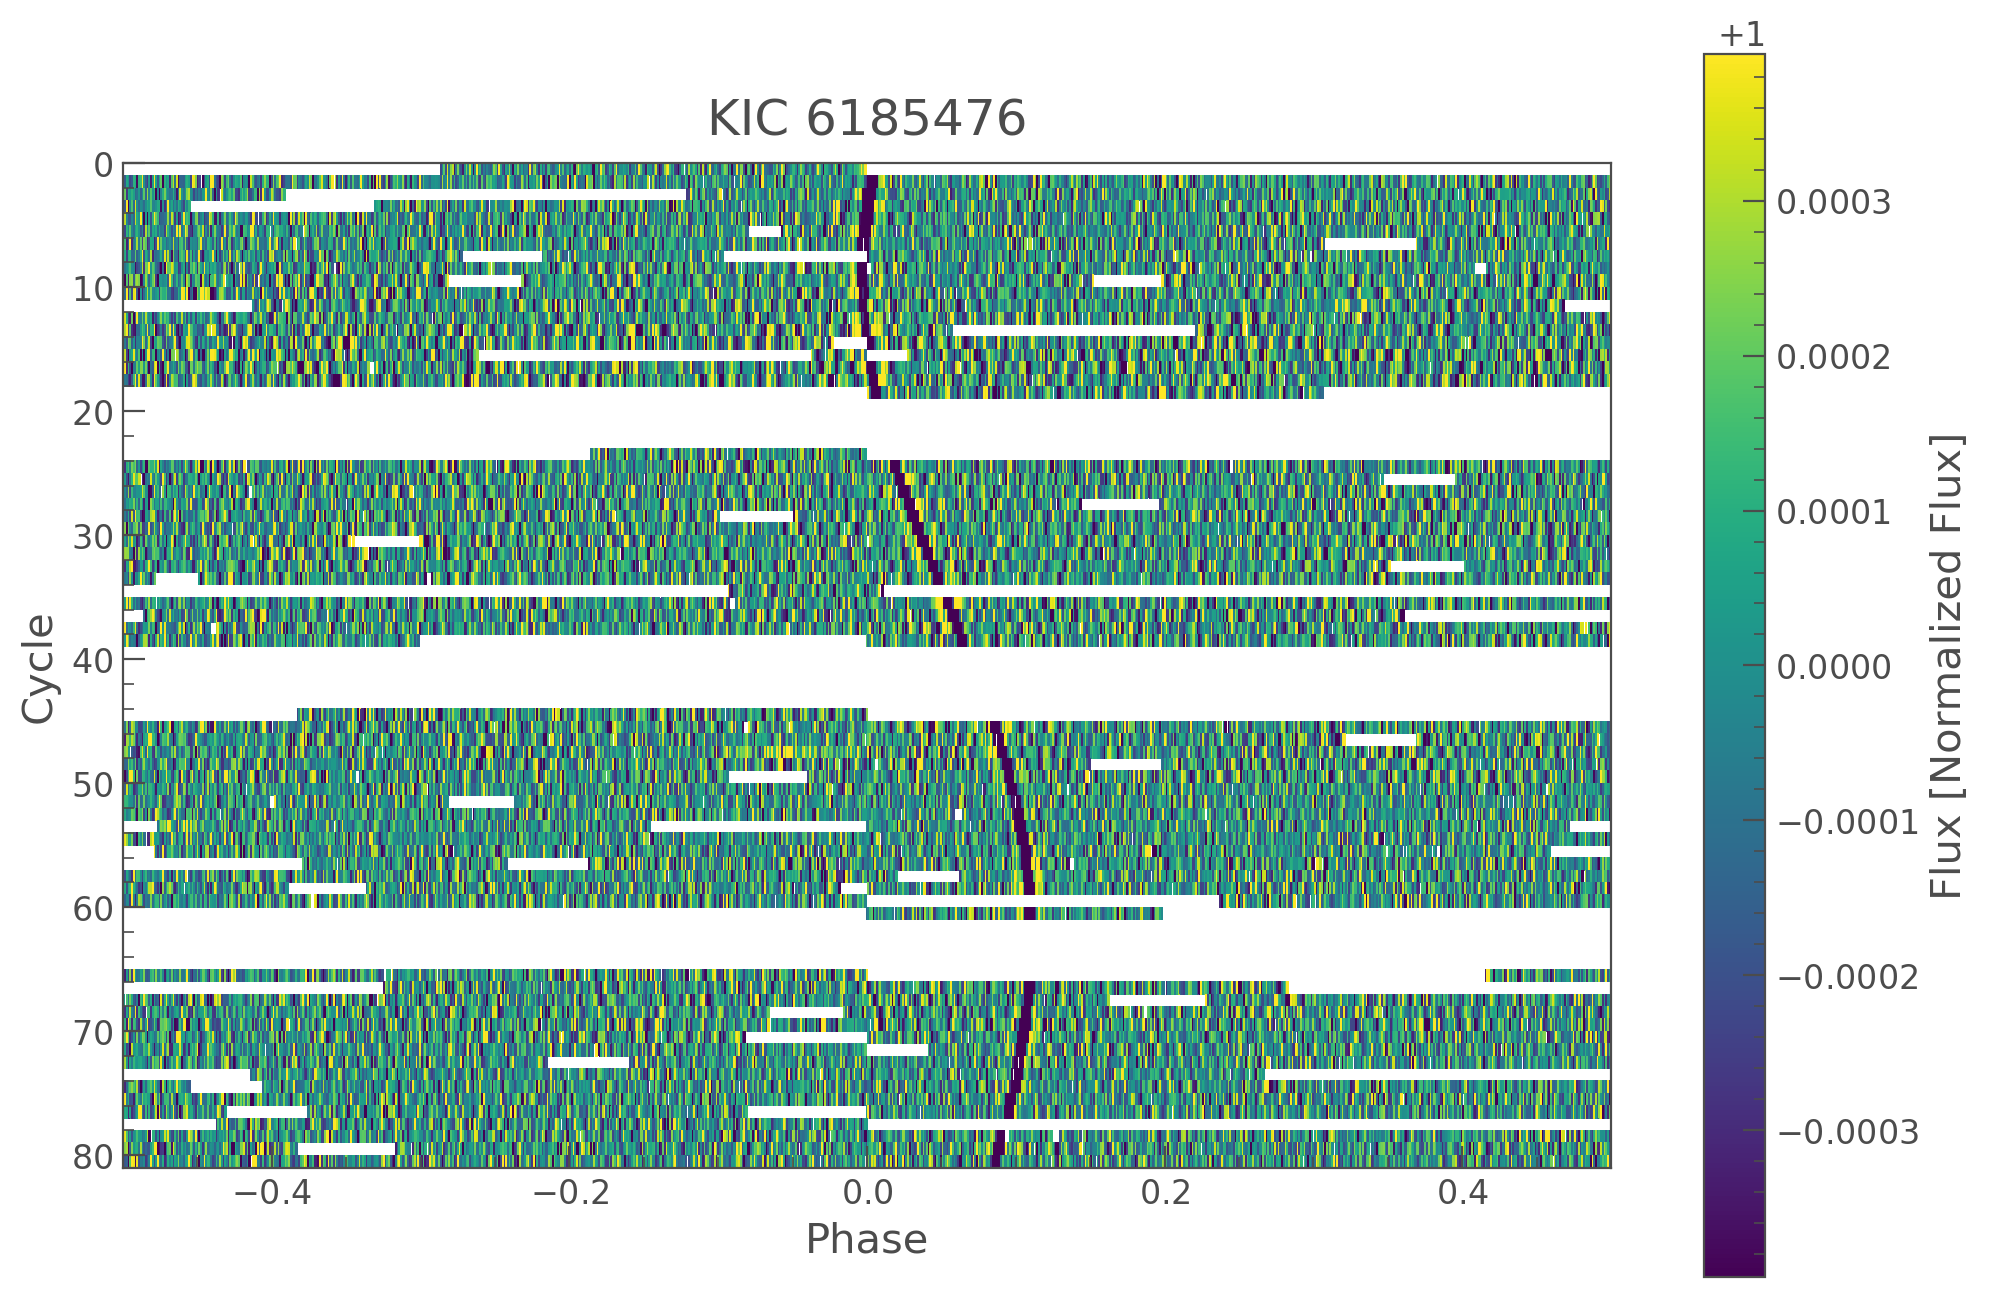

In [8]:
folded_lc.plot_river()

The river shows the same plot as the `fold` method, but each time the light curve is folded, a new row is started in the plot. The colorbar then shows the flux in each part of the light curve. 

In this case we see a beautiful trend as the planet candidate orbit changes. In some cases, the signal won't be this obvious. We can also use the `river` method to bin in time to increase the signal to noise in any bin.

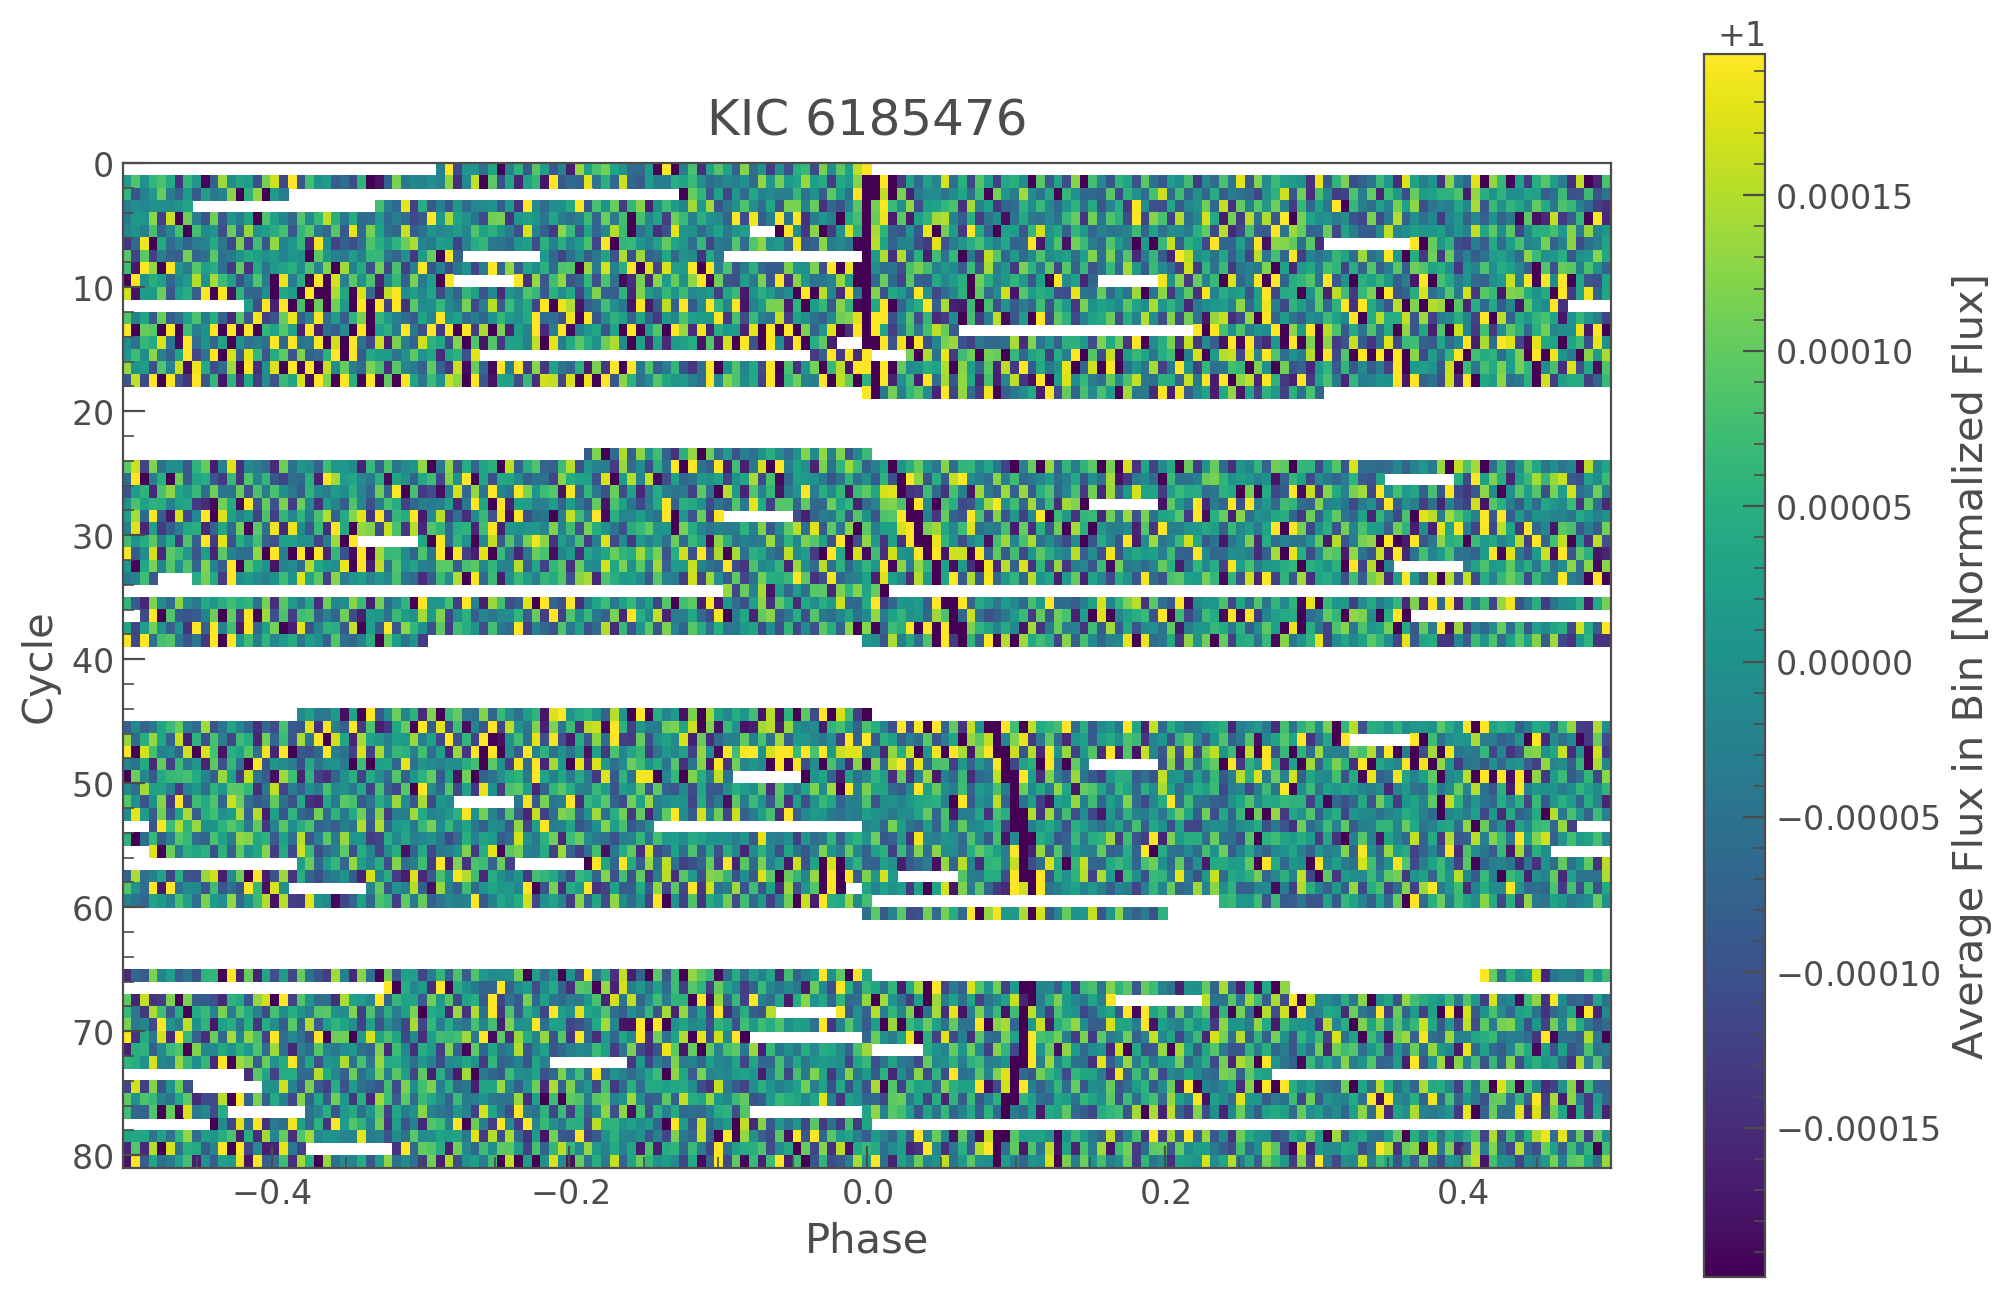

In [9]:
folded_lc.plot_river(bin_points=5, method='median')

Finally we can also use `plot_river` to look at the folded light curve in terms of standard deviation. This is useful when looking for signals that are of high significance.

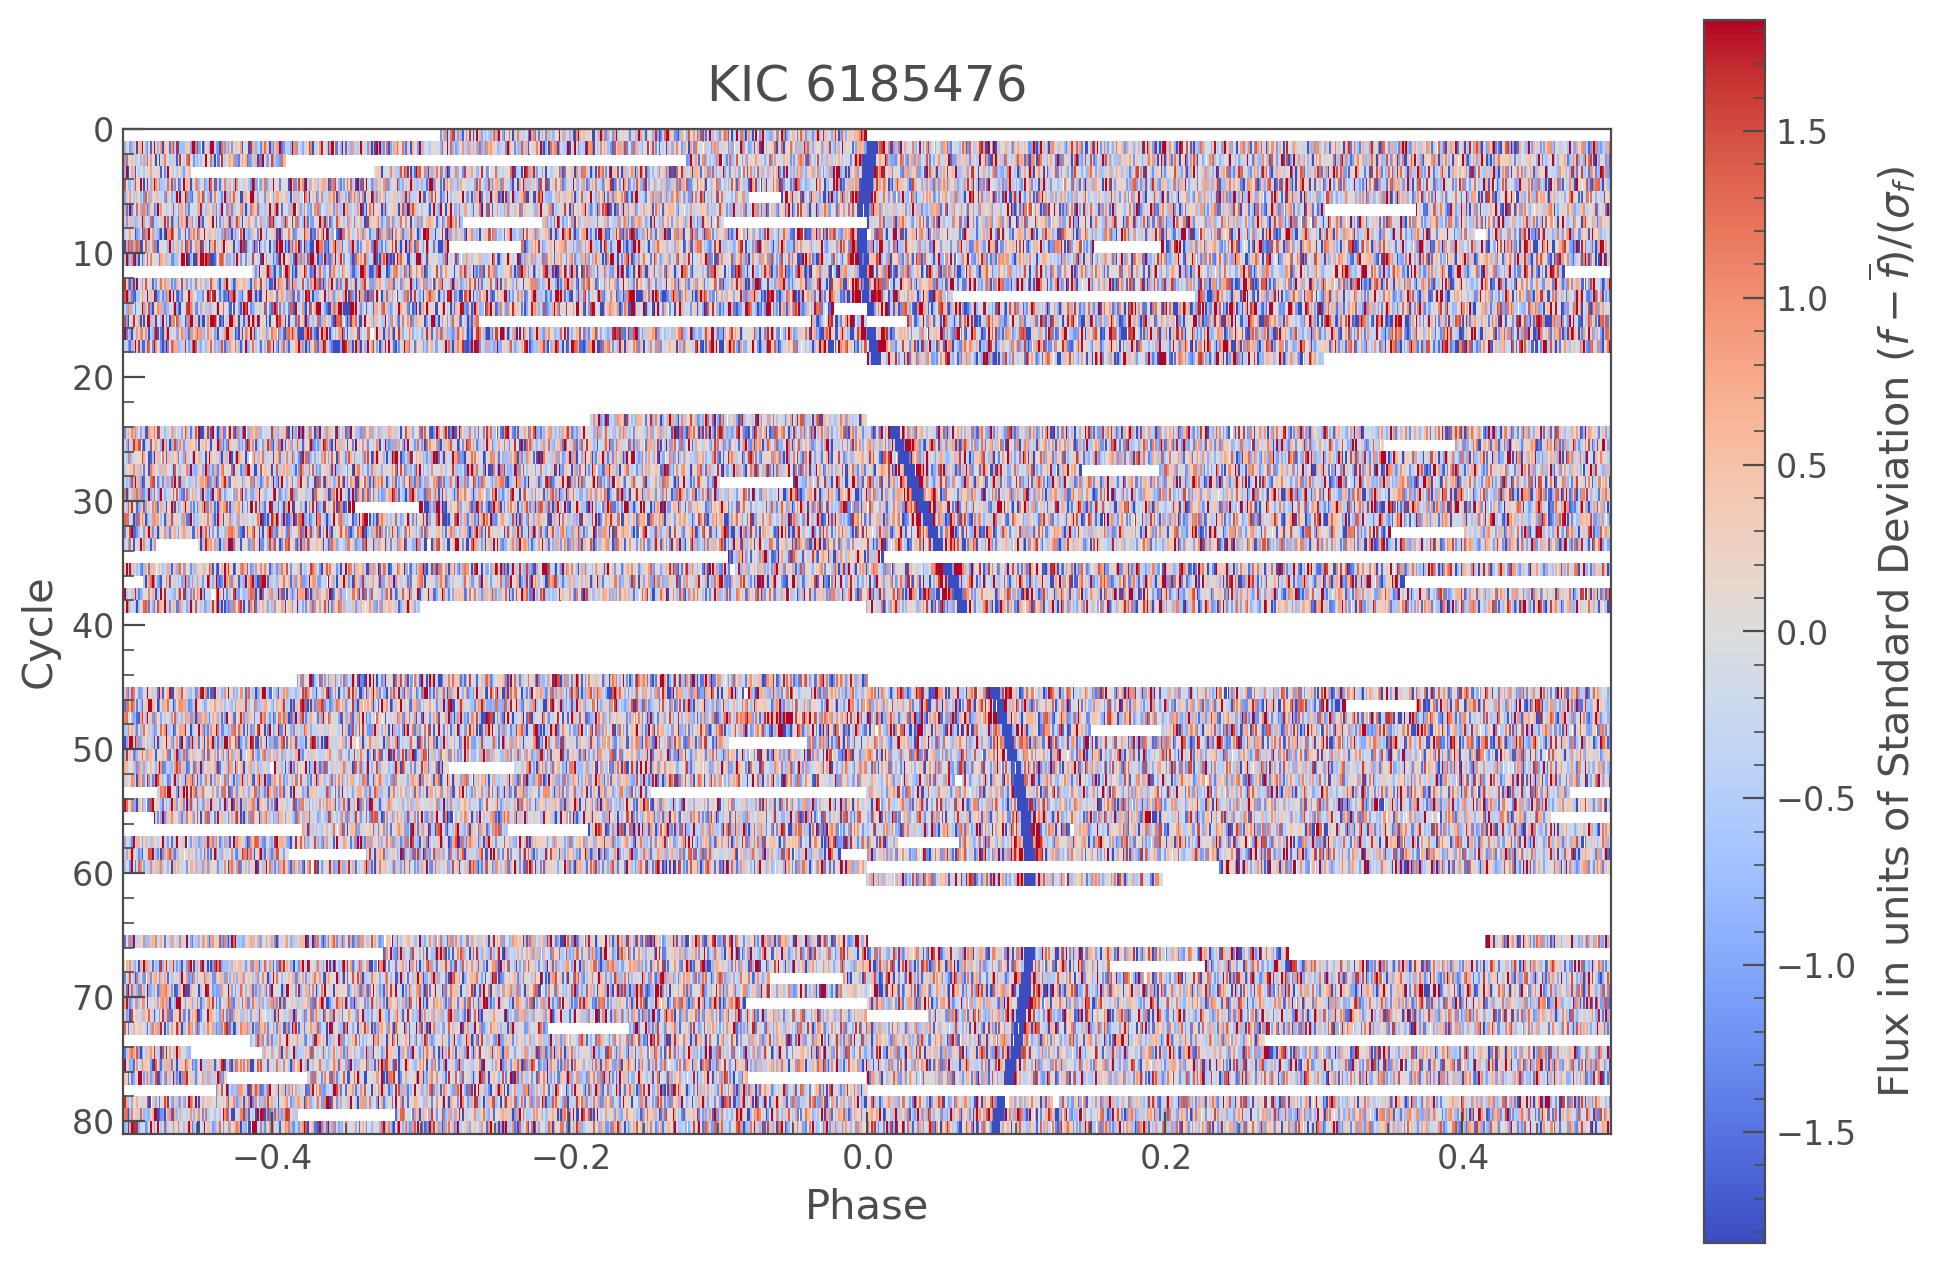

In [10]:
folded_lc.plot_river(method='sigma', bin_points=1)

We see in the above river plot that there is a signal around phase zero (our planet candidate) that is always $< -3\sigma$ from the mean, showing that it is a significant detection.